# **Method 1 : Custom method for Eigenfaces**

Import the necessary packages

In [33]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt


Import and pre-process the training data

In [34]:


# Get the current working directory
script_directory = os.getcwd()

# Set the path to the directory containing the train image dataset
dataset_path = os.path.join(script_directory, 'train')

# Set the dimensions for resizing the images
image_width, image_height = 100, 100

# Load the images from the train folder
train_images = []

# Load train images
for person_folder in os.listdir(dataset_path):
    person_folder_path = os.path.join(dataset_path, person_folder)
    if os.path.isdir(person_folder_path):  # Check if it is a directory
        for image_file in os.listdir(person_folder_path):
            image_path = os.path.join(person_folder_path, image_file)
            if os.path.isfile(image_path):  # Check if it is a file
                image = Image.open(image_path).convert('L')  # Convert to grayscale
                image = image.resize((image_width, image_height), Image.ANTIALIAS)
                image_data = np.asarray(image)
                train_images.append(image_data)


Calculate the average face and subtract the average face from all the images, we combined the differences into one image for better visual comparison

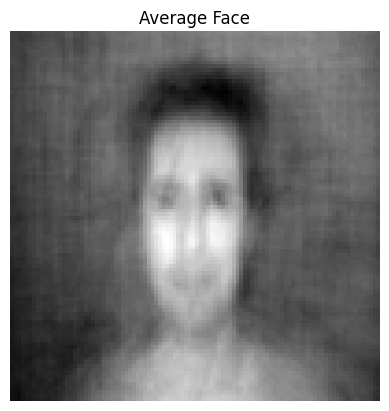

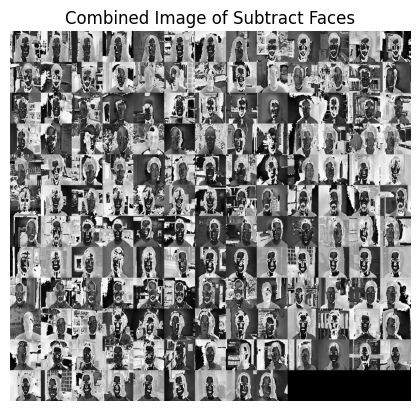

In [35]:

# Convert the list of images to a numpy arrayi
train_images = np.array(train_images)

if train_images.shape[0] > 0:
    # Calculate the average face
    average_face = np.mean(train_images, axis=0)
        
    plt.imshow(average_face.reshape(image_height, image_width), cmap='gray')
    plt.axis('off')
    plt.title('Average Face')
    plt.show()
    
    if average_face.ndim == 2:
        # Subtract average face from each training face
        subtracted_faces = train_images - average_face

        # Create a large combined image
        num_images = subtracted_faces.shape[0]
        rows = int(np.sqrt(num_images))
        cols = int(np.ceil(num_images / rows))
        combined_image = np.zeros((rows * image_height, cols * image_width), dtype=np.uint8)

        # Populate the combined image with subtracted faces
        for i, subtracted_face in enumerate(subtracted_faces):
            row = i // cols
            col = i % cols
            combined_image[row * image_height:(row + 1) * image_height, col * image_width:(col + 1) * image_width] = subtracted_face

        # Convert the combined image array to PIL Image for visualization
        combined_image = Image.fromarray(combined_image)

        # Display the combined image
        # Visualize the combined image of subtracted faces
        plt.imshow(combined_image, cmap='gray')
        plt.axis('off')
        plt.title('Combined Image of Subtract Faces')
        plt.show()
    else:
        print("No images found in the dataset.")
else:
    print("No images found in the dataset.")

Here we calculated the covariance matrix

In [36]:

# Get the current working directory
script_directory = os.getcwd()

# Set the path to the directory containing the train image dataset
train_dataset_path = os.path.join(script_directory, 'train')

# Set the path to the directory containing the test image dataset
test_dataset_path = os.path.join(script_directory, 'test')

# Set the dimensions for resizing the images
image_width, image_height = 100, 100

# Load the images from the train folder
train_images = []
person_labels = []  # List to store the person labels

# Load train images
for person_folder in os.listdir(train_dataset_path):
    person_folder_path = os.path.join(train_dataset_path, person_folder)
    if os.path.isdir(person_folder_path):  # Check if it is a directory
        for image_file in os.listdir(person_folder_path):
            image_path = os.path.join(person_folder_path, image_file)
            if os.path.isfile(image_path):  # Check if it is a file
                image = Image.open(image_path).convert('L')  # Convert to grayscale
                image = image.resize((image_width, image_height), Image.ANTIALIAS)
                image_data = np.asarray(image)
                train_images.append(image_data)
                person_labels.append(person_folder)  # Add the person label

# Convert the list of images to a numpy array
train_images = np.array(train_images)

# Convert the list of person labels to a numpy array
person_labels = np.array(person_labels)

if train_images.shape[0] > 0:
    # Calculate the average face
    average_face = np.mean(train_images, axis=0)

    # Print the average face
    

    # Flatten the images and subtract the average face
    flattened_images = train_images.reshape(train_images.shape[0], -1)
    subtracted_faces = flattened_images - average_face.flatten()

    try:
        # Compute the covariance matrix
        covariance_matrix = np.cov(subtracted_faces.T)
        print("Covariance matrix shape:", covariance_matrix.shape)
        print("Covariance matrix:\n", covariance_matrix)
        print()

        # Perform singular value decomposition
        U, S, V = np.linalg.svd(subtracted_faces.T, full_matrices=False)

        # Select the top k eigenfaces
        num_eigenfaces = min(subtracted_faces.shape[1], min(image_width, image_height))
        selected_eigenfaces = U[:, :num_eigenfaces]

        # Reshape the eigenfaces to match the original image dimensions
        reshaped_eigenfaces = selected_eigenfaces.reshape(image_height, image_width, num_eigenfaces)

    except Exception as e:
        print("Error during SVD decomposition:", e)
        exit()

else:
    print("No images found in the dataset.")
    

Covariance matrix shape: (10000, 10000)
Covariance matrix:
 [[2902.1913123  2804.47908679 2716.54065005 ...  816.63550017
   794.43468979  739.39665389]
 [2804.47908679 2955.03241548 2899.40623911 ...  784.27466016
   815.61153712  755.78319972]
 [2716.54065005 2899.40623911 3011.58204078 ...  785.77788428
   851.28402754  762.89334263]
 ...
 [ 816.63550017  784.27466016  785.77788428 ... 3538.55542001
  3208.98318229 2936.79679331]
 [ 794.43468979  815.61153712  851.28402754 ... 3208.98318229
  3355.26415999 3136.66817707]
 [ 739.39665389  755.78319972  762.89334263 ... 2936.79679331
  3136.66817707 3235.72743116]]



Calculated the projections onto the face space and calculated the treshold

In [37]:
# Compute projections of each face onto the face space
face_projections = np.dot(subtracted_faces, selected_eigenfaces)

# Compute the threshold for face recognition
threshold = np.sum(np.abs(face_projections)) * 0.9

print("Threshold:", threshold)

Threshold: 4540570.581515387


Loaded the images prepprocessed them and flattend them to subtract the average face to recognize

In [38]:

# Load the test images
test_images = []

# Load test images
for image_file in os.listdir(test_dataset_path):
    image_path = os.path.join(test_dataset_path, image_file)
    if os.path.isfile(image_path):  # Check if it is a file
        image = Image.open(image_path).convert('L')  # Convert to grayscale
        image = image.resize((image_width, image_height), Image.ANTIALIAS)
        image_data = np.asarray(image)
        test_images.append(image_data)

# Convert the list of images to a numpy array
test_images = np.array(test_images)

# Flatten the test images and subtract the average face
flattened_test_images = test_images.reshape(test_images.shape[0], -1)
subtracted_test_faces = flattened_test_images - average_face.flatten()



Calculated the projection of the faces in the test folder onto the face space to classify them 

In [39]:
# Compute projections of each test face onto the face space
test_face_projections = np.dot(subtracted_test_faces, selected_eigenfaces)

# Classify the test images based on the threshold
for i, test_face_projection in enumerate(test_face_projections):
    distance = np.linalg.norm(face_projections - test_face_projection, axis=1)
    min_distance_index = np.argmin(distance)
    if distance[min_distance_index] < threshold:
        person_label = person_labels[min_distance_index]  # Retrieve the person label
        print("Test image", i, "belongs to person", person_label)
    else:
        print("Test image", i, "does not belong to any person in the training set")

Test image 0 belongs to person Person 11
Test image 1 belongs to person Person 8
Test image 2 belongs to person Person 9
Test image 3 belongs to person Person 19
Test image 4 belongs to person Person 5
Test image 5 belongs to person Person 13
Test image 6 belongs to person Person 4
Test image 7 belongs to person Person 9
Test image 8 belongs to person Person 1
Test image 9 belongs to person Person 6
Test image 10 belongs to person Person 2
Test image 11 belongs to person Person 4
Test image 12 belongs to person Person 4
Test image 13 belongs to person Person 18
Test image 14 belongs to person Person 8
Test image 15 belongs to person Person 3
Test image 16 belongs to person Person 19
Test image 17 belongs to person Person 18
Test image 18 belongs to person Person 9
Test image 19 belongs to person Person 19
Test image 20 belongs to person Person 9
Test image 21 belongs to person Person 5
Test image 22 belongs to person Person 10
Test image 23 belongs to person Person 15
Test image 24 bel

# **Method 2 : Builtin method for Eigenfaces**

Imported the necessary packages

In [40]:
import cv2
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from imutils import paths
import numpy as np
import os

Defined a function to preprocess the faces in the training dataset, then converted to numpy array

In [41]:

# Function to load and preprocess the face dataset
def load_face_dataset(inputPath):
    # Initialize the list of data and labels
    data = []
    labels = []

    # Loop over the image paths
    for imagePath in paths.list_images(inputPath):
        # Load the image, grayscale it, and extract the class label
        image = cv2.imread(imagePath)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        label = imagePath.split(os.path.sep)[-2]

        # Resize the image to a fixed size
        resized = cv2.resize(gray, (100, 100))

        # Update the data and labels lists
        data.append(resized.flatten())
        labels.append(label)

    # Convert the data and labels to NumPy arrays
    data = np.array(data)
    labels = np.array(labels)

    # Encode the string labels as integers
    le = LabelEncoder()
    labels = le.fit_transform(labels)

    # Return the data and labels
    return (data, labels)

Loaded the test and training datasets both test and train

In [42]:

# Load the face dataset
print("[INFO] loading dataset...")
trainPath = "train"  # Path to the folder containing the training face images
testPath = "test"  # Path to the folder containing the test face images
(trainX, trainY) = load_face_dataset(trainPath)
(testX, testY) = load_face_dataset(testPath)

[INFO] loading dataset...


Perform PCA on the training data then transforming the test data to the eigen space

In [43]:

# Perform PCA on the training data
print("[INFO] performing PCA...")
pca = PCA(n_components=100, whiten=True)
trainX = pca.fit_transform(trainX)
testX = pca.transform(testX)

[INFO] performing PCA...


Trained the classifier by the training data to classify the test data

In [44]:


# Train the KNN classifier on the training data
print("[INFO] training classifier...")
model = KNeighborsClassifier(n_neighbors=5)
model.fit(trainX, trainY)


[INFO] training classifier...


KNeighborsClassifier()

Predict and print the output of the process

In [45]:

# Test the classifier on the test images
print("[INFO] testing classifier...")
for i in range(len(testX)):
    features = testX[i].reshape(1, -1)
    label = model.predict(features)[0]
    print("Predicted label for test image {}: {}".format(i+1, label))

[INFO] testing classifier...
Predicted label for test image 1: 2
Predicted label for test image 2: 15
Predicted label for test image 3: 10
Predicted label for test image 4: 15
Predicted label for test image 5: 0
Predicted label for test image 6: 17
Predicted label for test image 7: 13
Predicted label for test image 8: 11
Predicted label for test image 9: 15
Predicted label for test image 10: 15
Predicted label for test image 11: 15
Predicted label for test image 12: 15
Predicted label for test image 13: 0
Predicted label for test image 14: 10
Predicted label for test image 15: 17
Predicted label for test image 16: 10
Predicted label for test image 17: 10
Predicted label for test image 18: 11
Predicted label for test image 19: 15
Predicted label for test image 20: 3
Predicted label for test image 21: 15
Predicted label for test image 22: 10
Predicted label for test image 23: 10
Predicted label for test image 24: 6
Predicted label for test image 25: 7
Predicted label for test image 26: 1